# Damien Lim HW1 9/11/20

# Question 4a

In [1]:
#display images
from PIL import Image
img1 = Image.open('image1.jpg')
img1.show()
img2 = Image.open('image2.jpg')
img2.show()

# Question 4b

In [2]:
#crop image1
image1_crop = img1.crop((1100, 100, 2100, 1100)) 
image1_crop.show()

In [3]:
#save cropped image
image1_crop.save("image1_crop.jpg", "")

In [4]:
# rotating cropped image 90 deg counter clockwise 
image1_crop_rotated = image1_crop.rotate(90) 
image1_crop_rotated.show()

In [5]:
#save cropped and rotated image
image1_crop_rotated.save("image1_crop_rotated.jpg", "")

In [6]:
#paste cropped and rotated image1 over image2
#create a copy of img2 to image2_pasted so that we dont change the original image
image2_pasted = img2.copy()
#paste onto the copied img2
image2_pasted.paste(image1_crop_rotated, (100, 100))
image2_pasted.show()

In [7]:
image2_pasted.save("image2_pasted.jpg", "")

# Question 4c

In [8]:
img1.size

(3264, 2448)

In [9]:
image1_composite = img1.crop((1376, 968, 1888, 1480)) 
image2_composite = img2.crop((1376, 712, 1888, 1736)) 

image12_composited = image2_composite.copy()
#paste onto the copied img2
image12_composited.paste(image1_composite, (0, 0))
image12_composited.show()

In [10]:
image12_composited.save("image12_composited.jpg", "")

# Question 5a

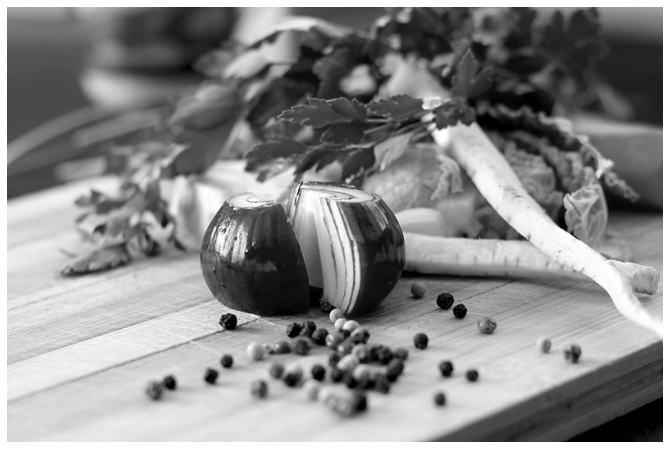

In [34]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16,8]

A = imread('svd_test.jpg')
X = np.mean(A, -1); # Convert RGB to grayscale

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

# Question  5b

In [40]:
img3 = Image.open('svd_test.jpg')
np.linalg.svd(img3) 

(array([[[-0.04555702, -0.02972212, -0.00375554, ..., -0.04502986,
          -0.04502986, -0.04502986],
         [-0.04575128, -0.02928221, -0.0116678 , ...,  0.00623106,
           0.00623106,  0.00623106],
         [-0.04585257, -0.02910957, -0.02134865, ..., -0.01122385,
          -0.01122385, -0.01122385],
         ...,
         [-0.04465107, -0.01095409,  0.00841944, ...,  0.99791623,
          -0.00208377, -0.00208377],
         [-0.04465107, -0.01095409,  0.00841944, ..., -0.00208377,
           0.99791623, -0.00208377],
         [-0.04465107, -0.01095409,  0.00841944, ..., -0.00208377,
          -0.00208377,  0.99791623]],
 
        [[-0.04560661, -0.03005251, -0.00371636, ..., -0.04478813,
          -0.04478813, -0.04478813],
         [-0.0458037 , -0.02961716, -0.01167294, ...,  0.00631831,
           0.00631831,  0.00631831],
         [-0.04590123, -0.02985944, -0.01829733, ..., -0.01142736,
          -0.01142736, -0.01142736],
         ...,
         [-0.04441119, -0.0111545

# Question 5c

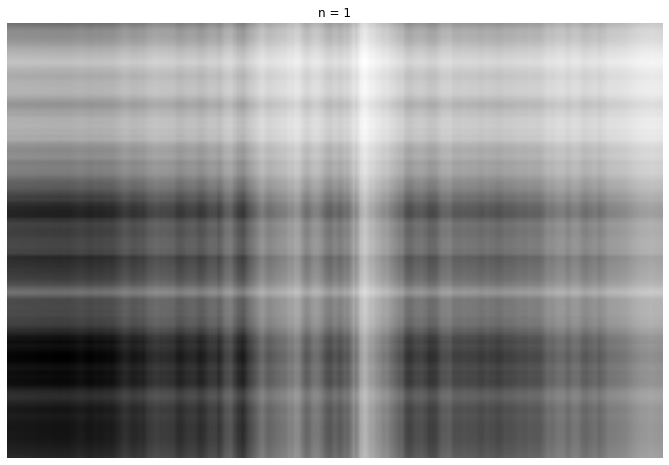

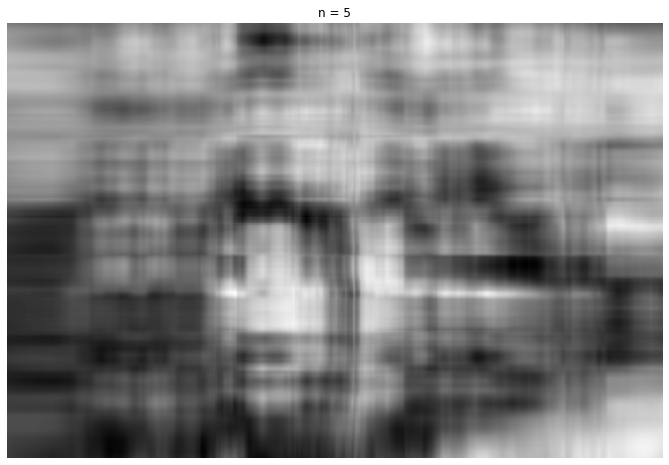

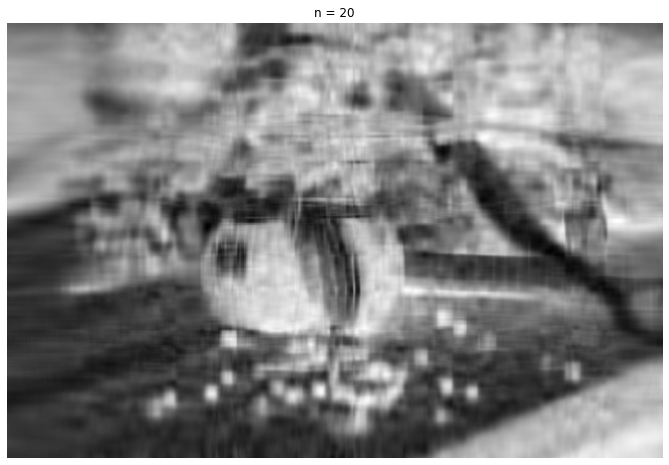

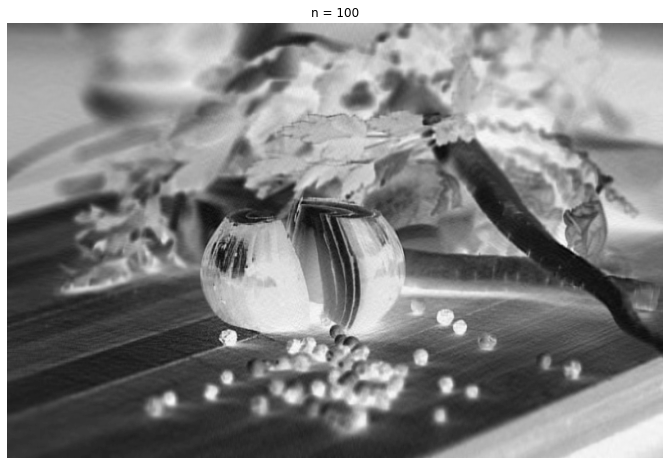

In [36]:
U, S, VT = np.linalg.svd(X, full_matrices=False)
S = np.diag(S)

j = 0
for n in (1, 5, 20, 100):
    #Construct approximate image
    Xapprox = U[:,:n] @S[0:n, :n] @ VT[:n,:]
    plt.figure(j+1)
    j +=1 
    img = plt.imshow(256-Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('n = ' + str(n))
    plt.savefig("rank_" + str(n) + "_approx.jpg")
    plt.show()